In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print sys.version
print pandas.__version__
print matplotlib.__version__
print seaborn.__version__
print sklearn.__version__

2.7.15 |Anaconda, Inc.| (default, Nov 13 2018, 17:07:45) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
0.23.4
2.2.3
0.9.0
0.19.2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
games = pandas.read_csv('games.csv')

In [4]:
print games.columns
print games.shape

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')
(81312, 20)


In [5]:
games.head(2)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939


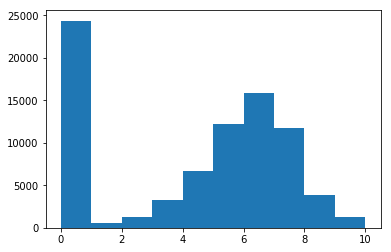

In [6]:
# Make a histogram of all rating in the average_columns
plt.hist(games["average_rating"])
plt.show()

In [7]:
# Print the first row of all the games with zero scores
pandas.DataFrame(games[games["average_rating"] == 0]).head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0


In [8]:
pandas.DataFrame(games[games["average_rating"] >0]).head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [9]:
#Remove rows without user revies
games = games[games["average_rating"] >0]

In [10]:
# Remove rows with missing values
games = games.dropna(axis=0)

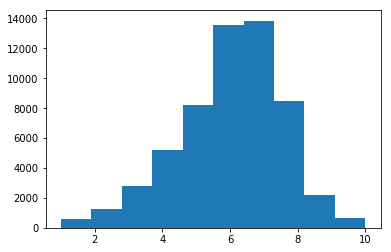

In [11]:
# Make a histogram of all the average ratings
plt.hist(games["average_rating"])
plt.show()

In [12]:
print games.columns

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


In [13]:
#Correlation matrix
corrmat = games.corr()
corrmat

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.002767,-0.050234,0.006141,-0.022017,-0.026729,-0.022017,0.099168,-0.057778,0.304201,-0.117172,-0.040308,-0.112069,0.017463,0.024777,-0.089659,-0.078830,-0.082301
yearpublished,0.002767,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,-0.050234,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.006141,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,-0.026729,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.099168,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,-0.057778,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.304201,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081


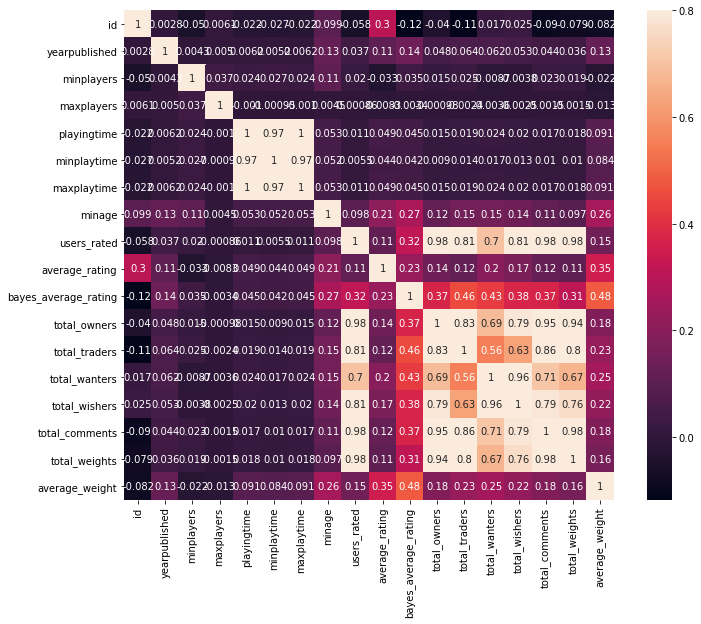

In [14]:
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax = .8,square=True,annot=True)

In [15]:
columns = games.columns.tolist()
columns

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [16]:
#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

In [17]:
columns

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [18]:
target = "average_rating"

In [19]:
from sklearn.model_selection import train_test_split
train = games.sample(frac=0.8,random_state=1)
test = games.loc[~games.index.isin(train.index)]

In [20]:
print train.shape
print test.shape

(45515, 20)
(11379, 20)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix

#Initialize the model class
LR = LinearRegression()

LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#Genrate predictions for the test set
predictions = LR.predict(test[columns])
# Compute error between our test prediction and actual value

print "mean_squared_error = ",mean_squared_error(predictions,test[target])
print "\n"

mean_squared_error =  2.0788190326293243




In [27]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators =100,min_samples_leaf=10,random_state=1)

In [28]:
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [29]:
predictions = RFR.predict(test[columns])
print "mean_squared_error = ",mean_squared_error(predictions,test[target])
print "\n"

mean_squared_error =  1.4458564605687358




In [30]:
from sklearn.grid_search import GridSearchCV

/Users/rishav/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rishav/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
RandomForestRegressor()

In [31]:
para_grid = {'n_estimators':[50,100,150,200,250,300]}

In [33]:
grid = GridSearchCV(RandomForestRegressor(random_state=0),para_grid,verbose=3)

In [34]:
grid.fit(train[columns],train[target])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=50 .................................................
[CV] ........................ n_estimators=50, score=0.391801 -   6.7s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ........................ n_estimators=50, score=0.388589 -   6.8s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV] ........................ n_estimators=50, score=0.381082 -   7.3s
[CV] n_estimators=100 ................................................
[CV] ....................... n_estimators=100, score=0.396727 -  14.4s
[CV] n_estimators=100 ................................................
[CV] ....................... n_estimators=100, score=0.397185 -  14.1s
[CV] n_estimators=100 ................................................
[CV] ....................... n_estimators=100, score=0.386998 -  14.5s
[CV] n_estimators=150 ................................................
[CV] ....................... n_estimators=150, score=0.397735 -  20.4s
[CV] n_estimators=150 ................................................
[CV] ....................... n_estimators=150, score=0.399539 -  19.9s
[CV] n_estimators=150 ................................................
[CV] ....................... n_estimators=150, score=0.389044 -  20.1s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  7.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [35]:
grid.best_params_


{'n_estimators': 300}

In [36]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
RFR = RandomForestRegressor(n_estimators =300,min_samples_leaf=10,random_state=1)
RFR.fit(train[columns],train[target])

predictions = RFR.predict(test[columns])
print "mean_squared_error = ",mean_squared_error(predictions,test[target])
print "\n"

mean_squared_error =  1.44511252303814


